<a href="https://colab.research.google.com/github/azizul-topo/CSE-4102-Assignment/blob/main/student_success_at_99_no_tuning_needed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import xgboost
import lightgbm
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('/content/student_performance.csv')
df = pd.DataFrame(data)
df.head()

,student_id,weekly_self_study_hours,attendance_percentage,class_participation,total_score,grade
0,1,18.5,95.6,3.8,97.9,A
1,2,14.0,80.0,2.5,83.9,B
2,3,19.5,86.3,5.3,100.0,A
3,4,25.7,70.2,7.0,100.0,A
4,5,13.4,81.9,6.9,92.0,A


In [3]:
df.shape

(1000000, 6)

In [4]:
df.isnull().sum()

,0
student_id,0
weekly_self_study_hours,0
attendance_percentage,0
class_participation,0
total_score,0
grade,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 6 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   student_id               1000000 non-null  int64  
 1   weekly_self_study_hours  1000000 non-null  float64
 2   attendance_percentage    1000000 non-null  float64
 3   class_participation      1000000 non-null  float64
 4   total_score              1000000 non-null  float64
 5   grade                    1000000 non-null  object 
dtypes: float64(4), int64(1), object(1)
memory usage: 45.8+ MB


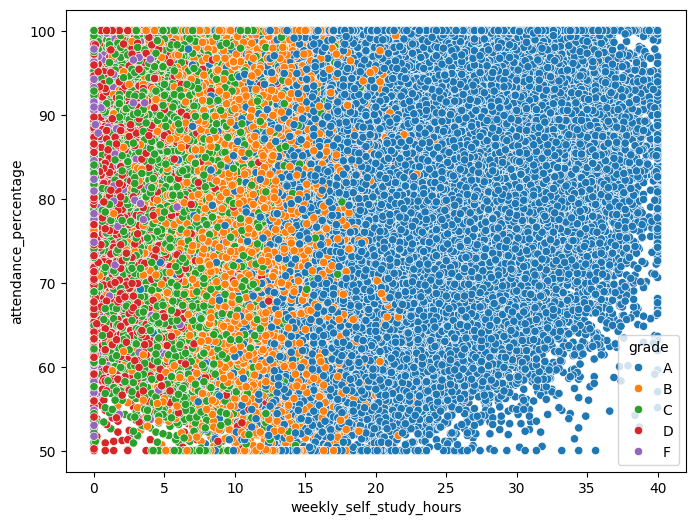

In [6]:
plt.figure(figsize=(8,6))
sns.scatterplot(x = 'weekly_self_study_hours', y = 'attendance_percentage', hue = 'grade', legend = 'auto', data = df)
plt.show()

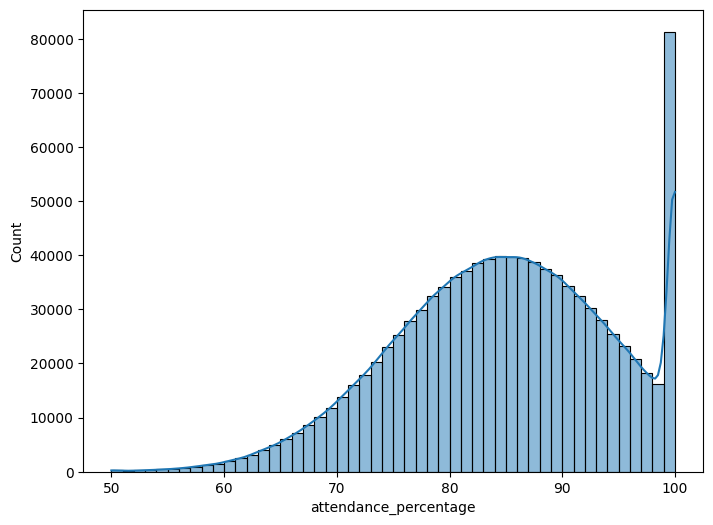

In [7]:
plt.figure(figsize=(8,6))
sns.histplot(x = 'attendance_percentage', kde = True, bins = 50, data = df)
plt.show()

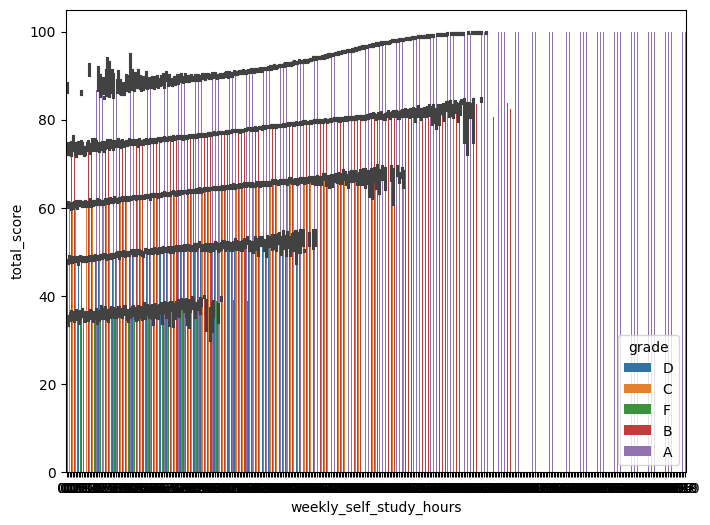

In [8]:
plt.figure(figsize=(8,6))
sns.barplot(x = 'weekly_self_study_hours', y = 'total_score', hue = 'grade', data = df)
plt.show()

In [9]:
le = LabelEncoder()
df['grade'] = le.fit_transform(df['grade'])
df.head()

,student_id,weekly_self_study_hours,attendance_percentage,class_participation,total_score,grade
0,1,18.5,95.6,3.8,97.9,0
1,2,14.0,80.0,2.5,83.9,1
2,3,19.5,86.3,5.3,100.0,0
3,4,25.7,70.2,7.0,100.0,0
4,5,13.4,81.9,6.9,92.0,0


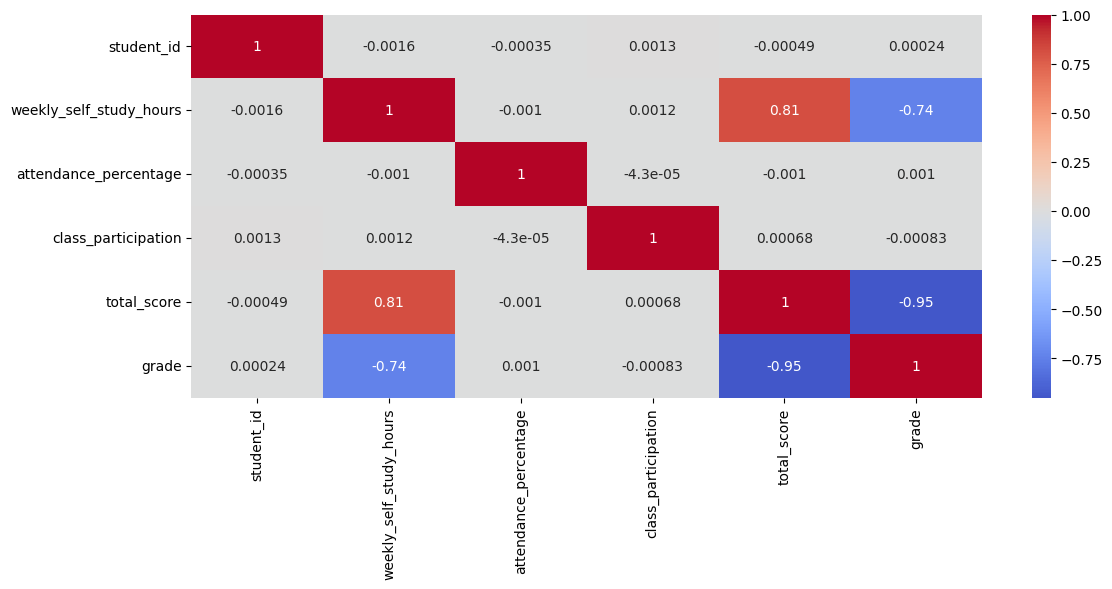

In [10]:
plt.figure(figsize=(12,6))
sns.heatmap(
    df.corr(),
    annot = True,
    center = 0,
    fmt = '.2g',
    cmap = 'coolwarm'
)
plt.tight_layout()
plt.show()

In [11]:
X = df.drop(['student_id', 'grade'], axis = 1)
y = df['grade']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [12]:
gbm = HistGradientBoostingClassifier(
    class_weight = 'balanced',
    random_state = 42
)

gbm.fit(X_train, y_train)

HistGradientBoostingClassifier(class_weight='balanced', random_state=42)

In [13]:
gb_train = gbm.predict(X_train)

accuracy_gb_train = accuracy_score(y_train, gb_train)
print("Training Accuracy of Hist Gradient Boosting : ", accuracy_gb_train)

gb_test = gbm.predict(X_test)
accuracy_gb_test = accuracy_score(y_test, gb_test)
print("Testing Accuracy of Hist Gradient Boosting : ", accuracy_gb_test, "\n")

print("Classification Report of Hist Gradient Boosting \n ", classification_report(y_test, gb_test))
print("Confusion Matrix of Hist Gradient Boosting \n ", confusion_matrix(y_test, gb_test))

gb_cv = cross_val_score(gbm, X, y, cv = 5)
print("cross val score of Hist Gradient Boosting : ", gb_cv)
print("cross val mean of Hist Gradient Boosting : ", gb_cv.mean())
print("cross val std of Hist Gradient Boosting : ", gb_cv.std())

Training Accuracy of Hist Gradient Boosting :  0.99649
Testing Accuracy of Hist Gradient Boosting :  0.996175 

Classification Report of Hist Gradient Boosting 
                precision    recall  f1-score   support

           0       1.00      1.00      1.00    109888
           1       0.99      1.00      1.00     51556
           2       1.00      0.99      1.00     28380
           3       0.99      0.96      0.98      8927
           4       0.77      0.99      0.87      1249

    accuracy                           1.00    200000
   macro avg       0.95      0.99      0.97    200000
weighted avg       1.00      1.00      1.00    200000

Confusion Matrix of Hist Gradient Boosting 
  [[109694    194      0      0      0]
 [     3  51540     13      0      0]
 [     0    137  28199     44      0]
 [     0      0      2   8566    359]
 [     0      0      0     13   1236]]
cross val score of Hist Gradient Boosting :  [0.99487  0.994895 0.994845 0.994865 0.99484 ]
cross val mean of H

In [14]:
xgb = XGBClassifier(
    class_weight = 'balanced',
    random_state = 42
)

xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              class_weight='balanced', colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, feature_weights=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None, ...)

In [15]:
xgb_train = xgb.predict(X_train)

accuracy_xgb_train = accuracy_score(y_train, xgb_train)
print("Training Accuracy of Xtreme Gradient Boosting : ", accuracy_xgb_train)

xgb_test = xgb.predict(X_test)
accuracy_xgb_test = accuracy_score(y_test, xgb_test)
print("Testing Accuracy of Xtreme Gradient Boosting : ", accuracy_xgb_test, "\n")

print("Classification Report of Xtreme Gradient Boosting \n ", classification_report(y_test, xgb_test))
print("Confusion Matrix of Xtreme Gradient Boosting \n ", confusion_matrix(y_test, xgb_test))

xgb_cv = cross_val_score(xgb, X, y, cv = 5)
print("cross val score of Xtreme Gradient Boosting : ", xgb_cv)
print("cross val mean of Xtreme Gradient Boosting : ", xgb_cv.mean())
print("cross val std of Xtreme Gradient Boosting : ", xgb_cv.std())

Training Accuracy of Xtreme Gradient Boosting :  0.9984525
Testing Accuracy of Xtreme Gradient Boosting :  0.997225 

Classification Report of Xtreme Gradient Boosting 
                precision    recall  f1-score   support

           0       1.00      1.00      1.00    109888
           1       1.00      0.99      1.00     51556
           2       0.99      1.00      1.00     28380
           3       0.99      0.99      0.99      8927
           4       0.98      0.93      0.96      1249

    accuracy                           1.00    200000
   macro avg       0.99      0.98      0.99    200000
weighted avg       1.00      1.00      1.00    200000

Confusion Matrix of Xtreme Gradient Boosting 
  [[109846     42      0      0      0]
 [   202  51231    123      0      0]
 [     0     18  28360      2      0]
 [     0      0     64   8842     21]
 [     0      0      0     83   1166]]
cross val score of Xtreme Gradient Boosting :  [0.99716  0.997155 0.99737  0.997095 0.99707 ]
cross v

In [16]:
lgb = LGBMClassifier(
    class_weight = 'balanced',
    random_state = 42
)

lgb.fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010570 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 863
[LightGBM] [Info] Number of data points in the train set: 800000, number of used features: 4
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438


LGBMClassifier(class_weight='balanced', random_state=42)

In [17]:
lgb_train = lgb.predict(X_train)

accuracy_lgb_train = accuracy_score(y_train, lgb_train)
print("Training Accuracy of Light GBM : ", accuracy_xgb_train)

lgb_test = lgb.predict(X_test)
accuracy_lgb_test = accuracy_score(y_test, lgb_test)
print("Testing Accuracy of Light GBM : ", accuracy_xgb_test, "\n")

print("Classification Report of Light GBM \n ", classification_report(y_test, lgb_test))
print("Confusion Matrix of Light GBM \n ", confusion_matrix(y_test, lgb_test))

lgb_cv = cross_val_score(lgb, X, y, cv = 5)
print("cross val score of Light GBM : ", lgb_cv)
print("cross val mean of Light GBM : ", lgb_cv.mean())
print("cross val std of Light GBM : ", lgb_cv.std())

Training Accuracy of Light GBM :  0.9984525
Testing Accuracy of Light GBM :  0.997225 

Classification Report of Light GBM 
                precision    recall  f1-score   support

           0       1.00      1.00      1.00    109888
           1       0.99      1.00      1.00     51556
           2       1.00      0.99      0.99     28380
           3       0.98      1.00      0.99      8927
           4       0.97      0.97      0.97      1249

    accuracy                           1.00    200000
   macro avg       0.99      0.99      0.99    200000
weighted avg       1.00      1.00      1.00    200000

Confusion Matrix of Light GBM 
  [[109758    130      0      0      0]
 [   169  51366     21      0      0]
 [     0    135  28107    138      0]
 [     0      0      3   8889     35]
 [     0      0      0     32   1217]]
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.035623 seconds.
You can set `force_col_wise=true` to remove the overhead.